# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


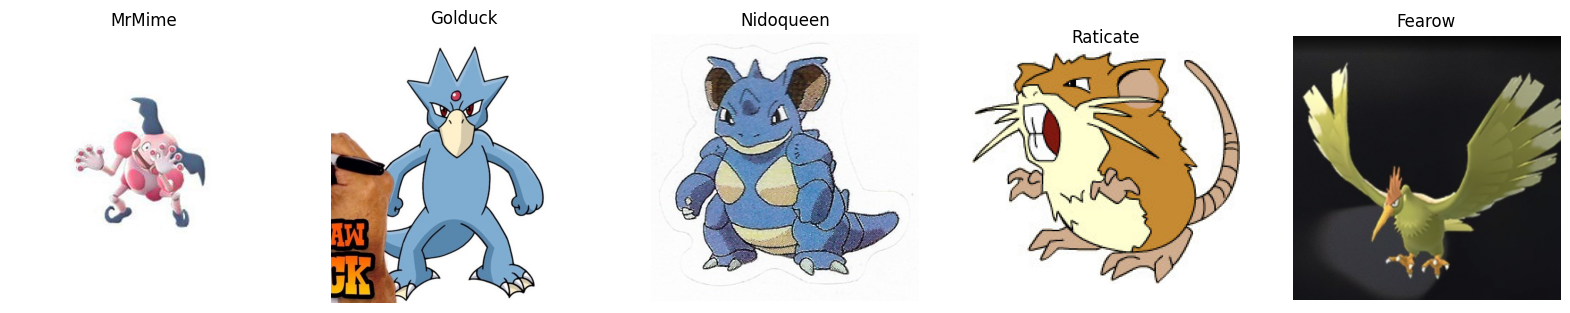

In [7]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

training_directory = 'data/training_set'
testing_directory = 'data/testing_set'

#plot 5 Pokemon as subplots together, turn off axis, normal colors
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [17]:
from PIL import Image
#use sklearn to create  CNN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


def resize_image(image_path):
    with Image.open(image_path) as img:
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((64, 64))
        return np.array(img)

#create sklearn model to classify pokemon images
model = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    max_iter=500,
    alpha=0.0001,
    solver='sgd',
    verbose=10,
    random_state=21,
    tol=0.000000001
)

#loop through creating dataset that contains [label, path_to_image]
dataset = []
#test with 100 images
for i in range(100):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = resize_image(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    dataset.append([random_pokemon, img])
    
    
# place training data into x and labels into y
labels = [x[0] for x in dataset]
images = [x[1] for x in dataset]

# Convert lists to NumPy arrays
y = np.array(labels)
x = np.array(images)

# Normalize pixel values if necessary (e.g., if your images are in color)
x = x / 255.0

# Flatten the image arrays for the MLP input
x = x.reshape(x.shape[0], -1)

print(f'x.shape: {x.shape}')
# 100 images, 12288 features
# the 12288 features are the 64px X 64px X 3 color channels (RGB)
print(f'y.shape: {y.shape}')
# 100 labels, one for each image


# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

x.shape: (100, 12288)
y.shape: (100,)


In [ ]:









#fit model to training data
model.fit(x_train, y_train)

# attempt to make predictions


#show images with prediction and actual labels
#graph accuracy and loss
